**Disclaimer**
<br>This model is adapted from [House prices prediction using keras](https://www.kaggle.com/code/hugosjoberg/house-prices-prediction-using-keras) (One example from the competition)



In [8]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras import metrics
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


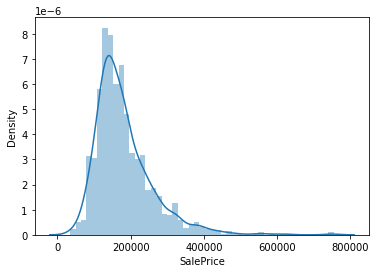

In [2]:
train = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Python-Elective-2022/regression---final-project-tanatlert/main/house-prices-for-competition/test.csv')

#fill na with mean
train = train.fillna(train.mean())
test = test.fillna(test.mean())

#preview the sale price
sns.distplot(train['SalePrice'])


**Choosing X and Y inputs**<br>
checking to see the relevent associations in each column

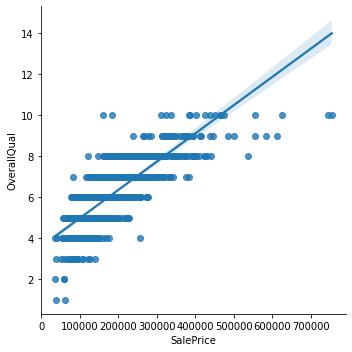

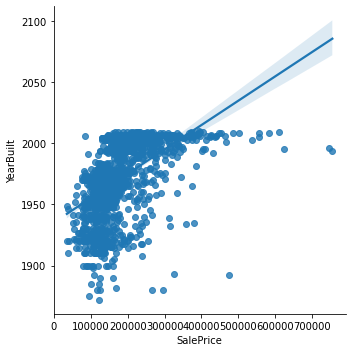

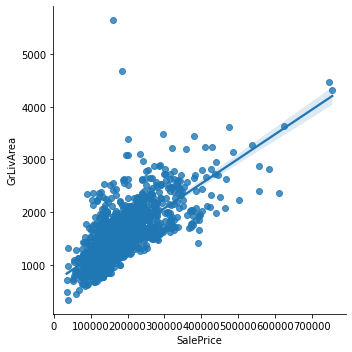

In [3]:

#sns.pairplot(train, kind='reg');
#After view through all the pattern (which take a long time to compute), here are possible x_train data

sns.lmplot(x='SalePrice', y='OverallQual', data=train)
sns.lmplot(x='SalePrice', y='YearBuilt', data=train)
sns.lmplot(x='SalePrice', y='GrLivArea', data=train)



In [4]:
train = pd.get_dummies(train)
#fill na with mean
train = train.fillna(train.mean())

X_train = train[['YearBuilt','GrLivArea','OverallQual']]
y_train = train['SalePrice'].values

scale = StandardScaler()
X_train = scale.fit_transform(X_train)


X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.33)


In [5]:
def create_model(): #adapt from reference code
  model = Sequential()
  model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
  model.add(Dense(40, activation='relu'))
  model.add(Dense(50, activation='relu'))
  model.add(Dense(1))
  # Compile model
  model.compile(optimizer ='adam', loss = 'mean_squared_error', 
            metrics =[metrics.mae])
  return model

model = create_model()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                40        
                                                                 
 dense_1 (Dense)             (None, 40)                440       
                                                                 
 dense_2 (Dense)             (None, 50)                2050      
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 2,581
Trainable params: 2,581
Non-trainable params: 0
_________________________________________________________________


Epoch 1/180
31/31 [==============================] - 2s 20ms/step - loss: 39078076416.0000 - mean_absolute_error: 180454.4062 - val_loss: 38959538176.0000 - val_mean_absolute_error: 181865.4062
Epoch 2/180
31/31 [==============================] - 0s 8ms/step - loss: 39077232640.0000 - mean_absolute_error: 180452.0938 - val_loss: 38958051328.0000 - val_mean_absolute_error: 181861.2188
Epoch 3/180
31/31 [==============================] - 0s 10ms/step - loss: 39074336768.0000 - mean_absolute_error: 180444.1719 - val_loss: 38952968192.0000 - val_mean_absolute_error: 181847.0781
Epoch 4/180
31/31 [==============================] - 0s 10ms/step - loss: 39065272320.0000 - mean_absolute_error: 180419.7344 - val_loss: 38938370048.0000 - val_mean_absolute_error: 181807.1406
Epoch 5/180
31/31 [==============================] - 0s 13ms/step - loss: 39042064384.0000 - mean_absolute_error: 180357.9844 - val_loss: 38903267328.0000 - val_mean_absolute_error: 181712.8750
Epoch 6/180
31/31 [============

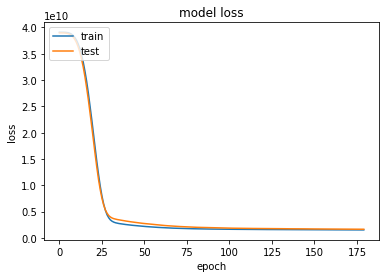

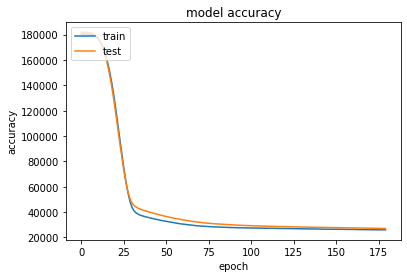

In [6]:
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), 
                    epochs=180, batch_size=32)

#training loss (from reference code)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

#accuracy $ (from reference code)
plt.plot(history.history['mean_absolute_error'])
plt.plot(history.history['val_mean_absolute_error'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

This model has under 0.5 loss 
and around $30k inaccuracy
